In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data_dir = "/kaggle/input/klasifikasi-buah-nanas-stroberi/Dataset"

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalisasi piksel gambar ke [0,1]
    validation_split=0.2,      # 20% data untuk validasi
    rotation_range=30,         # Rotasi acak sampai 30 derajat
    zoom_range=0.2,            # Zoom acak sampai 20%
    horizontal_flip=True       # Flip horizontal acak
)

In [ ]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),    # Ukuran input MobileNetV2
    batch_size=32,
    class_mode='categorical',  # Karena 2 kelas, pakai categorical_crossentropy
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze model dasar supaya bobotnya tidak berubah

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling global untuk flatten fitur
x = Dense(128, activation='relu')(x)  # Fully connected layer
predictions = Dense(2, activation='softmax')(x)  # Output layer 2 kelas

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6246 - loss: 1.1018 - val_accuracy: 0.9250 - val_loss: 0.2166
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9501 - loss: 0.1239 - val_accuracy: 0.9750 - val_loss: 0.0356
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9781 - loss: 0.0730 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 5.7630e-04 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 9/10


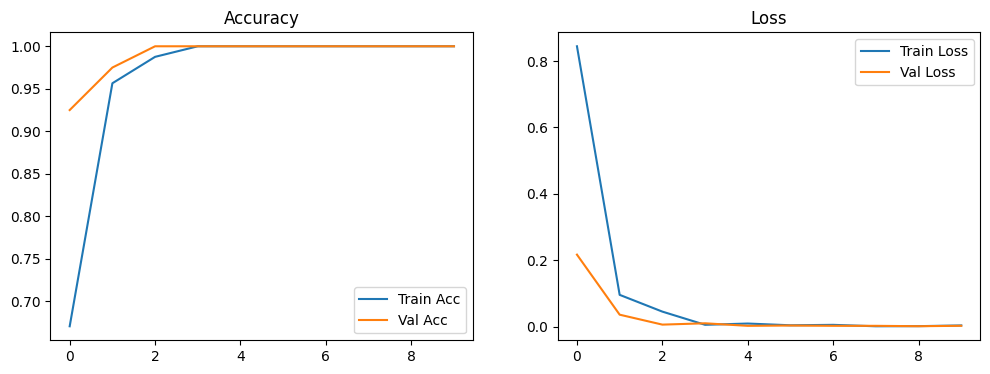

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


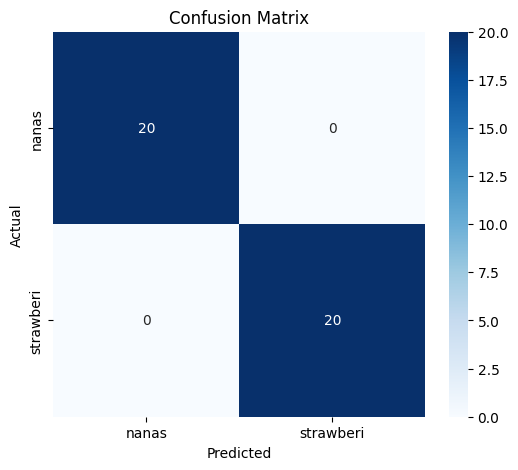

In [ ]:
val_gen.reset()  # Reset generator validasi
pred = model.predict(val_gen)
pred_classes = np.argmax(pred, axis=1)
true_classes = val_gen.classes
labels = list(val_gen.class_indices.keys())

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(true_classes, pred_classes, target_names=labels))

              precision    recall  f1-score   support

       nanas       1.00      1.00      1.00        20
   strawberi       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
base_model.trainable = True
# Tentukan layer berapa ke atas yang bisa di-train ulang
for layer in base_model.layers[:100]:
    layer.trainable = False


Klasifikasi Gambar: Nanas vs Stroberi
Deskripsi
Proyek ini melakukan klasifikasi dua jenis buah: nanas dan stroberi menggunakan transfer learning dengan MobileNetV2.

Dataset
Dataset terdiri dari lebih dari 200 foto, terbagi menjadi:

(Dataset/nanas): >100 foto gambar nanas dengan variasi sudut
(Dataset/strawberi): >100 foto gambar stroberi dengan variasi sudut
Cara Menjalankan
Upload dataset ke Kaggle dan hubungkan ke notebook.
Jalankan file notebook klasifikasi_nanas_stroberi.ipynb.
Pastikan menggunakan GPU/TPU untuk percepatan training.
Model akan melakukan training selama 10 epoch, kemudian menampilkan hasil evaluasi.
Model
Arsitektur: MobileNetV2 (pretrained ImageNet)
Teknik: Transfer Learning dengan data augmentation
Output: Akurasi, Confusion Matrix, dan laporan klasifikasi
Struktur Folder
Dataset 
    - nanas 
        -img_1.jpeg 
        -img_2.jpeg 
        -img_3.jpeg 
    - stroberi 
        -img_1.jpeg 
        -img_2.jpeg 
        -img_3.jpeg

# Klasifikasi Gambar: Nanas vs Stroberi

# Deskripsi
Proyek ini melakukan klasifikasi dua jenis buah: nanas dan stroberi menggunakan transfer learning dengan MobileNetV2.

# Dataset
Dataset terdiri dari lebih dari 200 foto, terbagi menjadi:
- (`Dataset/nanas`): >100 foto gambar nanas dengan variasi sudut
- (`Dataset/strawberi`): >100 foto gambar stroberi dengan variasi sudut

# Cara Menjalankan
1. Upload dataset ke Kaggle dan hubungkan ke notebook.
2. Jalankan file notebook `klasifikasi_nanas_stroberi.ipynb`.
3. Pastikan menggunakan GPU/TPU untuk percepatan training.
4. Model akan melakukan training selama 10 epoch, kemudian menampilkan hasil evaluasi.

## Model
- Arsitektur: MobileNetV2 (pretrained ImageNet)
- Teknik: Transfer Learning dengan data augmentation
- Output: Akurasi, Confusion Matrix, dan laporan klasifikasi

## Struktur Folder
Dataset
    - nanas
        -img_1.jpeg
        -img_2.jpeg
        -img_3.jpeg
    - stroberi
        -img_1.jpeg
        -img_2.jpeg
        -img_3.jpeg